# Sentiment Analysis of Trump and Biden's Tweets January 21st to August 15th 

In [2]:
%cd C:\Users\tenis\Desktop\Data_Projects\presidential_tweets_sentiment_analysis
import pandas as pd  
import numpy as np  
import nltk         
from os import getcwd
from nltk.corpus import twitter_samples 
import matplotlib as plt
from utils import process_tweet, build_freqs

C:\Users\tenis\Desktop\Data_Projects\presidential_tweets_sentiment_analysis


**corpura** - C:\Users\tenis\AppData\Roaming\nltk_data

In [2]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))



train_y.shape = (8000, 1)
test_y.shape = (2000, 1)
type(freqs) = <class 'dict'>
len(freqs) = 11340


In [3]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # calculate the sigmoid of z
    
    h = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return h



In [4]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = None
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = 1/(1+np.exp(-z))
        
        # calculate the cost function
        J = float(-1)/len(y) * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)) )
        print(J)

        # update the weights theta
        theta = theta - (alpha/len(y)) * (np.dot(x.transpose(), (h-y)))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [5]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word,1.0), 0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [6]:
tmp2 = extract_features('hate lies media', freqs)
print(tmp2)

[[ 1. 14. 51.]]


In [7]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
#print(f"The cost after training is {J:.8f}.")
#print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

[[0.69314718]]
[[0.69207586]]
[[0.69100784]]
[[0.68994309]]
[[0.68888162]]
[[0.68782341]]
[[0.68676844]]
[[0.68571671]]
[[0.68466821]]
[[0.68362292]]
[[0.68258084]]
[[0.68154194]]
[[0.68050623]]
[[0.67947369]]
[[0.67844431]]
[[0.67741807]]
[[0.67639497]]
[[0.67537499]]
[[0.67435813]]
[[0.67334437]]
[[0.67233371]]
[[0.67132612]]
[[0.6703216]]
[[0.66932014]]
[[0.66832173]]
[[0.66732635]]
[[0.666334]]
[[0.66534467]]
[[0.66435833]]
[[0.66337499]]
[[0.66239463]]
[[0.66141724]]
[[0.66044281]]
[[0.65947133]]
[[0.65850278]]
[[0.65753716]]
[[0.65657446]]
[[0.65561466]]
[[0.65465776]]
[[0.65370374]]
[[0.65275259]]
[[0.6518043]]
[[0.65085887]]
[[0.64991627]]
[[0.64897651]]
[[0.64803956]]
[[0.64710543]]
[[0.64617409]]
[[0.64524553]]
[[0.64431976]]
[[0.64339675]]
[[0.6424765]]
[[0.64155899]]
[[0.64064422]]
[[0.63973217]]
[[0.63882283]]
[[0.6379162]]
[[0.63701227]]
[[0.63611101]]
[[0.63521243]]
[[0.63431652]]
[[0.63342325]]
[[0.63253263]]
[[0.63164464]]
[[0.63075927]]
[[0.62987651]]
[[0.62899636]]
[

In [8]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)

sentiment = []
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    sentiment.append(y_pred)
    
    ### END CODE HERE ###
    
    return y_pred

In [9]:
biden = pd.read_csv('data/raw/JoeBidenTweets.csv')
trump = pd.read_csv('data/raw/trumps_tweets.csv')

# Biden

In [10]:
#Time
biden['timestamp'] = pd.to_datetime(biden['timestamp'])
start_date = '2020-01-01 01:01:00'
end_date = '2020-08-15 23:59:59'
mask = (biden['timestamp'] > start_date) & (biden['timestamp'] <= end_date)
biden = biden.loc[mask]


biden['Candidate'] = 'Biden'

biden = biden[['Candidate', 'timestamp', 'tweet']]
biden.columns = ['Candidate', 'date', 'tweet']

biden

,Candidate,date,tweet
207,Biden,2020-08-15 22:30:00,. @ KamalaHarris has spent her entire life fig...
208,Biden,2020-08-15 20:50:00,William Perry Pendley has no business working ...
209,Biden,2020-08-15 19:20:00,This was a big week for our campaign: @ Kamala...
210,Biden,2020-08-15 17:05:00,I know a thing or two about being Vice Preside...
211,Biden,2020-08-15 15:35:00,"Come January, there won’t be any time to waste..."
...,...,...,...
2098,Biden,2020-01-02 02:07:00,Every day that Donald Trump remains in the Whi...
2099,Biden,2020-01-02 01:05:00,This election is about the soul of our nation ...
2100,Biden,2020-01-02 00:01:00,With just over one month until the Iowa Caucus...
2101,Biden,2020-01-01 18:35:00,Every single human being deserves to be treate...


# Trump 

In [11]:
#Date cleaning
trump['created_at'] = pd.to_datetime(trump['created_at'])
start_date = '2020-01-01 01:01:00'
end_date = '2020-08-15 23:59:59'
mask = (trump['created_at'] > start_date) & (trump['created_at'] <= end_date)
trump = trump.loc[mask]

trump['Candidate'] = 'Trump'
trump = trump[['Candidate', 'created_at','text']]
trump.columns = ['Candidate', 'date', 'tweet']


trump

,Candidate,date,tweet
0,Trump,2020-08-15 04:14:00,We will bring safety to our cities. We will br...
1,Trump,2020-08-15 03:59:00,Today it was my great honor to proudly accept ...
2,Trump,2020-08-14 23:43:00,Senator @SteveDaines is doing a tremendous job...
3,Trump,2020-08-14 23:43:00,...Steve Bullock is totally against your Secon...
4,Trump,2020-08-14 23:41:00,Senator @CoryGardner is doing a terrific job -...
...,...,...,...
7158,Trump,2020-01-02 01:46:00,Can’t believe @ATT keeps the management after ...
7159,Trump,2020-01-02 01:36:00,Too bad Corey would have won! He (and I) loves...
7160,Trump,2020-01-02 01:32:00,Best equipment &amp; finest military in the Wo...
7161,Trump,2020-01-01 20:36:00,RT @Scavino45: President Trump speaks to the p...


# Joined df

In [12]:
df = pd.concat([biden, trump])
df = df.sort_values(by="date")

df.reset_index(inplace = True)
df = df.drop(['index'], axis=1)

df

,Candidate,date,tweet
0,Biden,2020-01-01 01:15:00,Our final fundraising deadline of 2019 is just...
1,Biden,2020-01-01 18:35:00,Every single human being deserves to be treate...
2,Trump,2020-01-01 20:36:00,RT @Scavino45: https://t.co/LZADtVwk1R
3,Trump,2020-01-01 20:36:00,RT @Scavino45: President Trump speaks to the p...
4,Biden,2020-01-02 00:01:00,With just over one month until the Iowa Caucus...
...,...,...,...
9054,Biden,2020-08-15 15:35:00,"Come January, there won’t be any time to waste..."
9055,Biden,2020-08-15 17:05:00,I know a thing or two about being Vice Preside...
9056,Biden,2020-08-15 19:20:00,This was a big week for our campaign: @ Kamala...
9057,Biden,2020-08-15 20:50:00,William Perry Pendley has no business working ...


In [13]:
def sentiment_column(tweets,freqs,theta):
    '''
    Input: 
        process_tweets: column of processed tweets
        
    Output: 
        sentiment_score: a list of sentiment scores
    '''
    #initiatize list for output
    sentiment_score = []
    
    # loop through every tweet and process it 
    for tweet in tweets:
        sentiment = predict_tweet(tweet, freqs, theta)
        sentiment_score.append(sentiment)
        
        
    return sentiment_score







In [14]:
sentiment = sentiment_column(tweets= df['tweet'], freqs=freqs, theta=theta)
type(sentiment)

list

In [15]:
df['Sentiment'] = pd.Series(sentiment)
df['Sentiment'] = df['Sentiment'].astype(str)
df['Sentiment'] = df['Sentiment'].str.strip('[]')
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce').fillna(0, downcast='infer')

print(type(df['Sentiment']))
df.info()


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Candidate  9059 non-null   object        
 1   date       9059 non-null   datetime64[ns]
 2   tweet      9059 non-null   object        
 3   Sentiment  9059 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 283.2+ KB


In [61]:
df

,Candidate,date,tweet,Sentiment
0,Biden,2020-01-01 01:15:00,Our final fundraising deadline of 2019 is just...,0.501557
1,Biden,2020-01-01 18:35:00,Every single human being deserves to be treate...,0.502065
2,Trump,2020-01-01 20:36:00,RT @Scavino45: https://t.co/LZADtVwk1R,0.500000
3,Trump,2020-01-01 20:36:00,RT @Scavino45: President Trump speaks to the p...,0.510092
4,Biden,2020-01-02 00:01:00,With just over one month until the Iowa Caucus...,0.487883
...,...,...,...,...
9054,Biden,2020-08-15 15:35:00,"Come January, there won’t be any time to waste...",0.488290
9055,Biden,2020-08-15 17:05:00,I know a thing or two about being Vice Preside...,0.501977
9056,Biden,2020-08-15 19:20:00,This was a big week for our campaign: @ Kamala...,0.503727
9057,Biden,2020-08-15 20:50:00,William Perry Pendley has no business working ...,0.498586


In [20]:
import seaborn as sns


In [21]:
sns.set_style(style="whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8))
ax = sns.violinplot(y=df["Sentiment"], x = df["Candidate"], scale="count", palette="Set2")
ax.set_title('Sentiment Analysis of Biden and Trump Tweets ')

ax.figure.savefig("reports/sentiment_total.png")

TypeError: 'module' object is not callable

# Based on these results, I'm not that sure if this model is an accurate representation. If it's true, Trump's tweets are on average more positive than Biden's! 

In [64]:
df['Weekday'] = df['date'].dt.dayofweek
df

,Candidate,date,tweet,Sentiment,Weekday
0,Biden,2020-01-01 01:15:00,Our final fundraising deadline of 2019 is just...,0.501557,2
1,Biden,2020-01-01 18:35:00,Every single human being deserves to be treate...,0.502065,2
2,Trump,2020-01-01 20:36:00,RT @Scavino45: https://t.co/LZADtVwk1R,0.500000,2
3,Trump,2020-01-01 20:36:00,RT @Scavino45: President Trump speaks to the p...,0.510092,2
4,Biden,2020-01-02 00:01:00,With just over one month until the Iowa Caucus...,0.487883,3
...,...,...,...,...,...
9054,Biden,2020-08-15 15:35:00,"Come January, there won’t be any time to waste...",0.488290,5
9055,Biden,2020-08-15 17:05:00,I know a thing or two about being Vice Preside...,0.501977,5
9056,Biden,2020-08-15 19:20:00,This was a big week for our campaign: @ Kamala...,0.503727,5
9057,Biden,2020-08-15 20:50:00,William Perry Pendley has no business working ...,0.498586,5


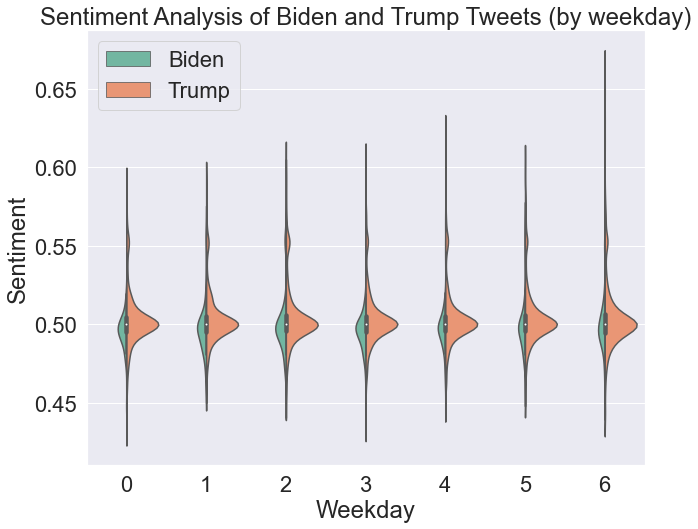

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.set(font_scale=2)

ax = sns.violinplot(data = df ,
                    y="Sentiment",
                    x = "Weekday",
                    hue = "Candidate",
                    scale="count",
                    palette="Set2",
                    split = True)

ax.set_title('Sentiment Analysis of Biden and Trump Tweets (by weekday)')

plt.legend(loc='upper left')

ax.figure.savefig("reports/sentiment_by_weekday.png")